<a href="https://colab.research.google.com/github/jcestevezc/Machine-Learning-Python/blob/master/CNN_for_image_classification_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción  a los Sistemas Inteligentes
# 2019-1
# CNN for image classification in Keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Download data

This is a dataset of images of cats and dogs that was extacted from this [Kaggle competition](https://www.kaggle.com/c/dogs-vs-cats/data). 

The file can be manually download from [here](https://drive.google.com/file/d/1Ys08yalsbM29fvvPhyDxv-SV7TBg3VxK/view?usp=sharing)

In [0]:
!wget -O cnn_data.zip "https://drive.google.com/drive/u/1/folders/1NGjqrgNCBmozpuuZJr2HFG14mtCVPR2n"

--2020-04-29 22:35:47--  https://drive.google.com/drive/u/1/folders/1NGjqrgNCBmozpuuZJr2HFG14mtCVPR2n
Resolving drive.google.com (drive.google.com)... 108.177.121.102, 108.177.121.139, 108.177.121.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.121.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/drive/folders/1NGjqrgNCBmozpuuZJr2HFG14mtCVPR2n [following]
--2020-04-29 22:35:47--  https://drive.google.com/drive/folders/1NGjqrgNCBmozpuuZJr2HFG14mtCVPR2n
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/folders/1NGjqrgNCBmozpuuZJr2HFG14mtCVPR2n&followup=https://drive.google.com/drive/folders/1NGjqrgNCBmozpuuZJr2HFG14mtCVPR2n [following]
--2020-04-29 22:35:47--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=htt

After downloading the file, we uncompress it*

In [0]:
#!unzip "/content/cnn_data.zip"

In [0]:
# !ls "/content/"

In [0]:
# !pwd

This creates the folder `data`:

In [4]:
!ls  "/content/drive/My Drive/Colab Notebooks/data"


train  validation


The following code loads and show an image from the dataset:

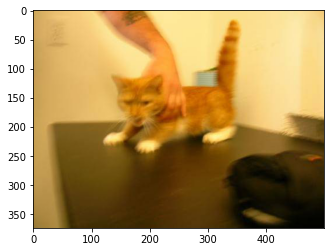

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('/content/drive/My Drive/Colab Notebooks/data/train/cat/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

## Data augmentation

The goal of *data augmentation* is to extend the training data set by applying different transformations to the original images. The transformation include: rotations, translations, scale change, etc. This is done by the `ImageDataGenerator` class.

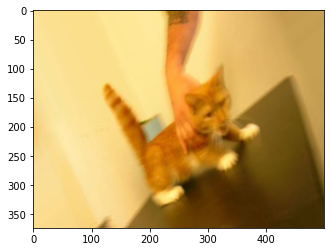

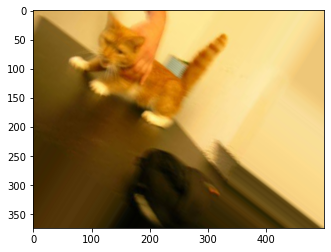

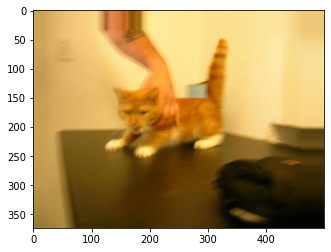

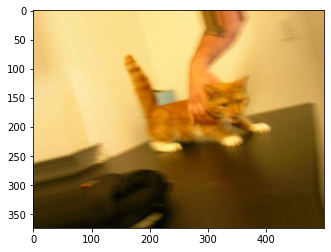

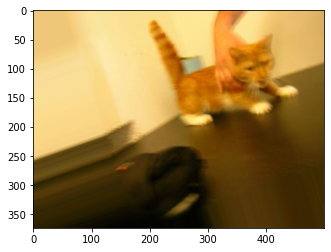

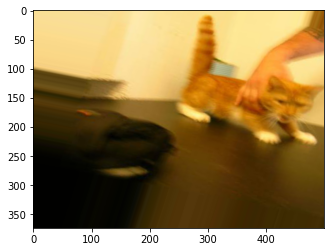

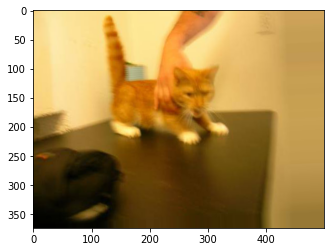

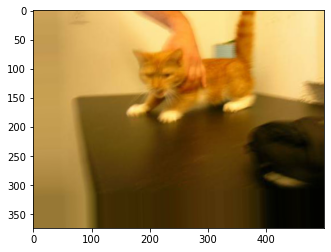

In [6]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/drive/My Drive/Colab Notebooks/data/train/cat/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, _, _)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, _, _)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1):
    i += 1
    if i > 8:
        break  # otherwise the generator would loop indefinitely
    plt.imshow(batch[0]/255) 
    plt.show()


## Conv Net for Dog-Cat discrimination

Training variables

In [0]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/content/drive/My Drive/Colab Notebooks/data/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/data/validation'
nb_train_samples = 2000
nb_validation_samples = 400
epochs = 50
batch_size = 16

The convolutional network model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [10]:
epochs = 1
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/1
125/125 [==============================] - 1618s 13s/step - loss: 0.7038 - accuracy: 0.5200 - val_loss: 0.6774 - val_accuracy: 0.5700


In [11]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18279092582174938005
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16924254521620985461
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 7038511866040989989
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14648777152
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13833408735882557915
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [12]:
!nvidia-smi

Thu Apr 30 02:34:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    29W /  70W |   1409MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Testing the classifier

We will use the validation generator to generate one batch of samples and we'll pass them to the model

[0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.]
[[0.46896785]
 [0.47924656]
 [0.45093033]
 [0.5395303 ]
 [0.34482145]
 [0.48242873]
 [0.49631572]
 [0.494342  ]
 [0.48995265]
 [0.4783403 ]
 [0.47044683]
 [0.48236394]
 [0.501601  ]
 [0.48964146]
 [0.49692366]
 [0.48152995]]


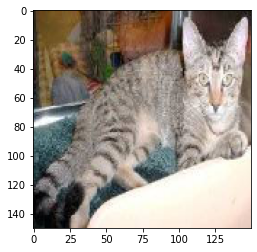

In [13]:
for x_batch, y_batch in validation_generator:
  plt.imshow(x_batch[0])
  print(y_batch)
  print(model.predict_proba(x_batch))
  break

## Transfer Learning

We will use a pretrained image classification model from Keras. They are documented [here](https://keras.io/applications/)

In [14]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 128, 128

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = '/content/drive/My Drive/Colab Notebooks/data/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/data/validation'
nb_train_samples = 2000
nb_validation_samples = 400
epochs = 50
batch_size = 16

datagen = ImageDataGenerator(rescale=1. / 255)

# build the MobileNet network
model = applications.MobileNet(include_top=False, weights='imagenet'
                               , input_shape=(img_width, img_height, 3))

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

bottleneck_features_train = model.predict_generator(
    generator, nb_train_samples // batch_size)

np.save('bottleneck_features_train.npy',
        bottleneck_features_train)

generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_validation = model.predict_generator(
    generator, nb_validation_samples // batch_size)
np.save('bottleneck_features_validation.npy',
        bottleneck_features_validation)

17227776/17225924 [==============================] - 3s 0us/step
Found 2000 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [15]:
bottleneck_features_validation.shape

(400, 4, 4, 1024)

In [16]:
model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [17]:
model_top = applications.MobileNet(include_top=True, weights='imagenet'
                               , input_shape=(img_width, img_height, 3))
model_top.summary(70)

17227776/17225924 [==============================] - 3s 0us/step
Model: "mobilenet_1.00_128"
______________________________________________________________________
Layer (type)                   Output Shape                Param #    
input_2 (InputLayer)           (None, 128, 128, 3)         0          
______________________________________________________________________
conv1_pad (ZeroPadding2D)      (None, 129, 129, 3)         0          
______________________________________________________________________
conv1 (Conv2D)                 (None, 64, 64, 32)          864        
______________________________________________________________________
conv1_bn (BatchNormalization)  (None, 64, 64, 32)          128        
______________________________________________________________________
conv1_relu (ReLU)              (None, 64, 64, 32)          0          
______________________________________________________________________
conv_dw_1 (DepthwiseConv2D)    (None, 64, 64, 32)      

In [18]:
train_data = np.load('bottleneck_features_train.npy')
train_labels = np.array(
    [0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = np.array(
    [0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

model_1 = Sequential()
model_1.add(Flatten(input_shape=train_data.shape[1:]))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

model_1.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))
model_1.save_weights(top_model_weights_path)

Train on 2000 samples, validate on 400 samples
Epoch 1/50
2000/2000 [==============================] - 1s 369us/step - loss: 1.2459 - accuracy: 0.9140 - val_loss: 0.2953 - val_accuracy: 0.9650
Epoch 2/50
2000/2000 [==============================] - 1s 317us/step - loss: 0.2109 - accuracy: 0.9665 - val_loss: 0.4553 - val_accuracy: 0.9675
Epoch 3/50
2000/2000 [==============================] - 1s 320us/step - loss: 0.1625 - accuracy: 0.9770 - val_loss: 0.4915 - val_accuracy: 0.9650
Epoch 4/50
2000/2000 [==============================] - 1s 324us/step - loss: 0.0679 - accuracy: 0.9905 - val_loss: 0.6592 - val_accuracy: 0.9725
Epoch 5/50
2000/2000 [==============================] - 1s 311us/step - loss: 0.0639 - accuracy: 0.9945 - val_loss: 0.4054 - val_accuracy: 0.9775
Epoch 6/50
2000/2000 [==============================] - 1s 315us/step - loss: 0.0380 - accuracy: 0.9930 - val_loss: 0.6088 - val_accuracy: 0.9650
Epoch 7/50
2000/2000 [==============================] - 1s 308us/step - loss:

In [0]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 4,194,817
Trainable params: 4,194,817
Non-trainable params: 0
_________________________________________________________________


In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

for x_batch, y_batch in validation_generator:
  print(y_batch)
  print(model_1.predict_proba(model.predict(x_batch)))
  break


Found 400 images belonging to 2 classes.
[0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.]
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]]
